In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams["figure.figsize"] = [12,12]
#If you have problems with latex at matplotlib just comment next two lines, this might help
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
def fix_scaling(ax=None):
    if not ax:
        xlim = plt.xlim()
        ylim = plt.ylim()
        d1 = xlim[1] - xlim[0]
        d2 = ylim[1] - ylim[0]
        if d1 > d2:
            plt.ylim((ylim[0] - (d1-d2) / 2, ylim[1] + (d1-d2) / 2))
        else:
            plt.xlim((xlim[0] + (d1-d2) / 2, xlim[1] - (d1-d2) / 2))
    else:
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        d1 = xlim[1] - xlim[0]
        d2 = ylim[1] - ylim[0]
        if d1 > d2:
            ax.set_ylim((ylim[0] - (d1-d2) / 2, ylim[1] + (d1-d2) / 2))
        else:
            ax.set_xlim((xlim[0] + (d1-d2) / 2, xlim[1] - (d1-d2) / 2))

In [3]:
a = 14
b = 6
def func(x):
    return a * x[0] ** 2 + b * (x[0] - x[1]) ** 2 - x[0] - 2 * x[1]
def f_grad(x):
    return np.array([2 * a * x[0] + 2 * b * (x[0] - x[1]) -1, 2 * b * (x[1] - x[0]) - 2])
def f_grad_2():
    return np.array([[2 * a + 2 * b, -2 * b], [-2 * b, 2 * b]])
def eigenvalues():
    w, v = np.linalg.eig(f_grad_2())
    return w

In [20]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
argmin = np.array([3/28, 23/84])
def animate_trajectory(trajes, colors):
    m = len(trajes)
    fig, ax = plt.subplots()
    n = 20
    def step(t):
            ax.cla()
            ax.plot([argmin[0]], [argmin[1]], 'o', color='green')
            #Level contours
            delta = 0.025
            x = np.arange(-3, 3, delta)
            y = np.arange(-3, 3, delta)
            X, Y = np.meshgrid(x, y)
            Z = np.zeros_like(X)
        #print(X.shape, Y.shape)
            for i in range(X.shape[0]):
                for j in range(X.shape[1]):
                    Z[i][j] = func([X[i][j], Y[i][j]])
            CS = ax.contour(X, Y, Z, [2, 10, 30], colors=['blue', 'purple', 'red'])
            for i in range(0,m):
                traj = trajes[i]
                ax.plot([u[0] for u in traj[:t]], [u[1] for u in traj[:t]], color=colors[i])
                ax.plot([u[0] for u in traj[:t]], [u[1] for u in traj[:t]], 'o', color=colors[i])
        
                fix_scaling(ax)
            ax.axis('off')

    return FuncAnimation(fig, step,
                     frames=range(n), interval=600)

In [21]:
alpha = 1.0 / (sum(list(eigenvalues())))
traj_opt_step = []
x_start = np.array([2, 2.8])
traj_opt_step.append(x_start.copy())
cur_x = x_start.copy()
for i in range(20):
    cur_x = cur_x - alpha * f_grad(cur_x)
    traj_opt_step.append(cur_x.copy())

In [22]:
lambdas = list(eigenvalues())
alpha = 1.5 / (np.sqrt(lambdas[0]) + np.sqrt(lambdas[1])) ** 2
beta = (np.sqrt(lambdas[0]) - np.sqrt(lambdas[1])) / (np.sqrt(lambdas[0]) + np.sqrt(lambdas[1]))
traj_heavy_ball = []
x_start = np.array([2, 2.8])
traj_heavy_ball.append(x_start.copy())
cur_x = x_start.copy()
prev_x = x_start.copy()
for i in range(20):
    t = cur_x
    cur_x = cur_x - alpha * f_grad(cur_x) + beta * (cur_x - prev_x)
    prev_x = t
    traj_heavy_ball.append(cur_x.copy())

In [23]:
#Chebyshev
phi = 1.5 * (lambdas[0] + lambdas[1]) / (lambdas[0] - lambdas[1])
cur_gamma   = 1.0 / phi
prev_gamma  = 0
print(phi - np.sqrt(phi ** 2 - 1))
print('phi', phi)
traj_chebyshev = []
x_start = np.array([2, 2.8])
traj_chebyshev.append(x_start.copy())
cur_x = x_start.copy()
prev_x = x_start.copy()
for i in range(20):
    t = cur_x
    alpha = 4 * cur_gamma / (lambdas[0] - lambdas[1])
    beta = cur_gamma * prev_gamma
    cur_x = cur_x - alpha * f_grad(cur_x) + beta * (cur_x - prev_x)
    prev_x = t
    t = cur_gamma
    cur_gamma = 1.0 / (2 * phi - cur_gamma)
    prev_gamma = t
    print('gamma', cur_gamma)
    traj_chebyshev.append(cur_x.copy())

0.2513312597269908
('phi', 2.1150719637318978)
('gamma', 0.2661452508026814)
('gamma', 0.2522705181229532)
('gamma', 0.25139060424894366)
('gamma', 0.25133500842218465)
('gamma', 0.2513314965225506)
('gamma', 0.251331274684752)
('gamma', 0.2513312606718337)
('gamma', 0.2513312597866741)
('gamma', 0.2513312597307608)
('gamma', 0.2513312597272289)
('gamma', 0.2513312597270058)
('gamma', 0.2513312597269917)
('gamma', 0.2513312597269909)
('gamma', 0.25133125972699083)
('gamma', 0.25133125972699083)
('gamma', 0.25133125972699083)
('gamma', 0.25133125972699083)
('gamma', 0.25133125972699083)
('gamma', 0.25133125972699083)
('gamma', 0.25133125972699083)


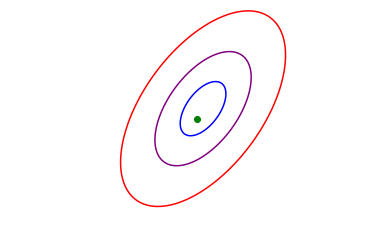

In [24]:
#Nesterov
alpha = 1 / (lambdas[0] + 1)
beta = (np.sqrt(lambdas[0]) - np.sqrt(lambdas[1])) / (np.sqrt(lambdas[0]) + np.sqrt(lambdas[1]))
traj_nesterov = []
x_start = np.array([2, 2.8])
traj_nesterov.append(x_start.copy())
cur_x = x_start.copy()
cur_y = x_start.copy()

for i in range(20):
    t = cur_x
    cur_x = cur_y - alpha * f_grad(cur_y)
    cur_y = cur_x + beta * (cur_x - t)
    traj_nesterov.append(cur_x.copy())
    
#print(traj)
base_animation = animate_trajectory([traj_opt_step, traj_heavy_ball, traj_chebyshev, traj_nesterov], 
                                   ['black', 'deeppink', 'olive', 'forestgreen'])
HTML(base_animation.to_html5_video())  

[]

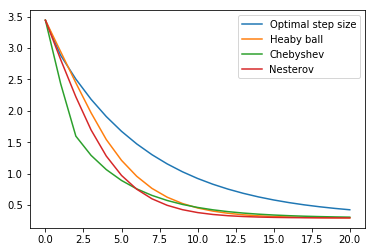

In [26]:
%matplotlib inline
fig, ax = plt.subplots()
u = np.array(traj_opt_step)
ax.plot(range(21), [np.linalg.norm(t - argmin) for t in u], label='Optimal step size')
u = np.array(traj_heavy_ball)
ax.plot(range(21), [np.linalg.norm(t - argmin) for t in u], label='Heaby ball')
u = np.array(traj_chebyshev)
ax.plot(range(21), [np.linalg.norm(t - argmin) for t in u], label='Chebyshev')
u = np.array(traj_nesterov)
ax.plot(range(21), [np.linalg.norm(t - argmin) for t in u], label='Nesterov')
plt.legend()
plt.plot()

[]

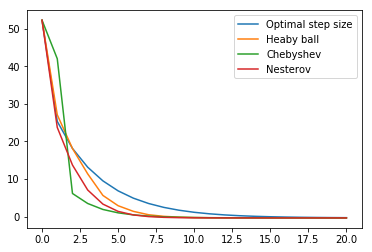

In [27]:
%matplotlib inline
fig, ax = plt.subplots()
u = np.array(traj_opt_step)
ax.plot(range(21), [func(t - argmin) for t in u], label='Optimal step size')
u = np.array(traj_heavy_ball)
ax.plot(range(21), [func(t - argmin) for t in u], label='Heaby ball')
u = np.array(traj_chebyshev)
ax.plot(range(21), [func(t - argmin) for t in u], label='Chebyshev')
u = np.array(traj_nesterov)
ax.plot(range(21), [func(t - argmin) for t in u], label='Nesterov')
plt.legend()
plt.plot()